<a href="https://colab.research.google.com/github/HemantSinghRawat987/Cosmic-Classifier-/blob/main/CosmicClassifierIITR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72

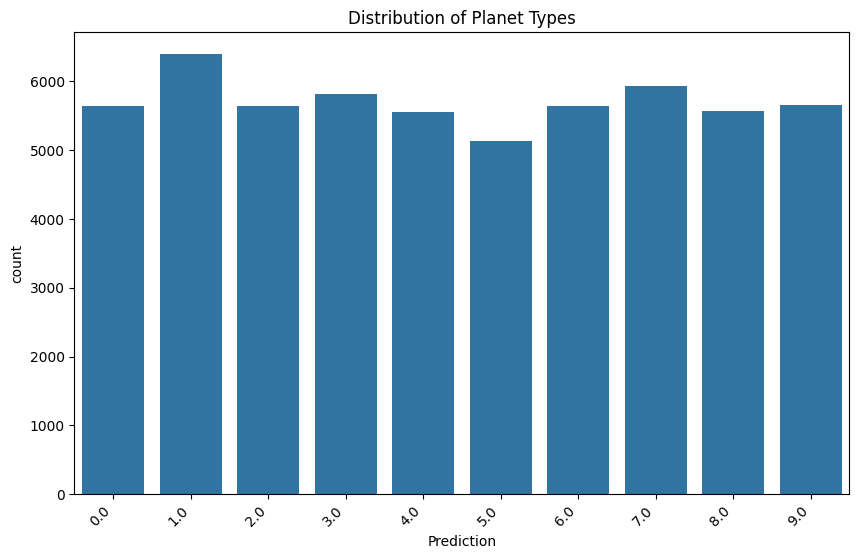

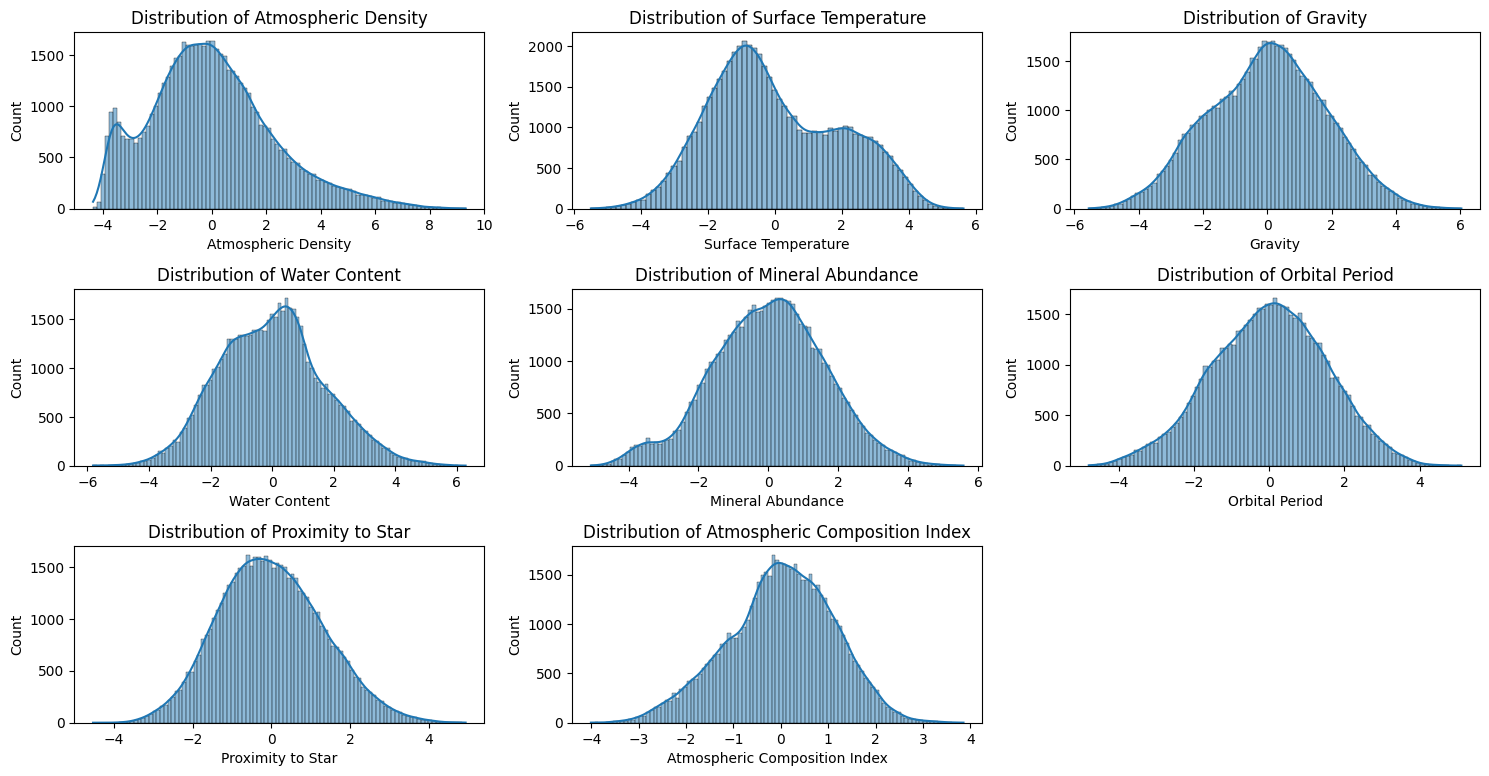

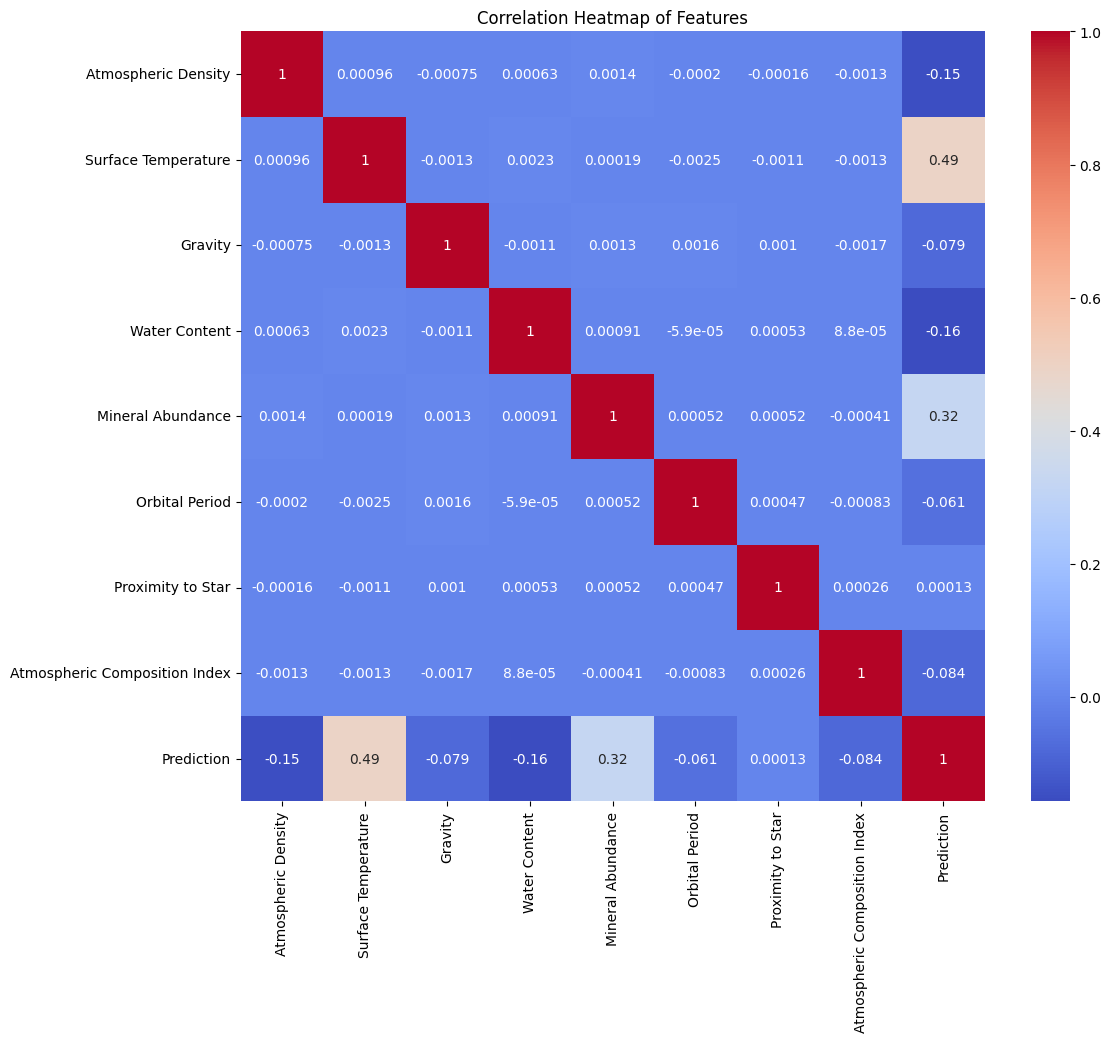

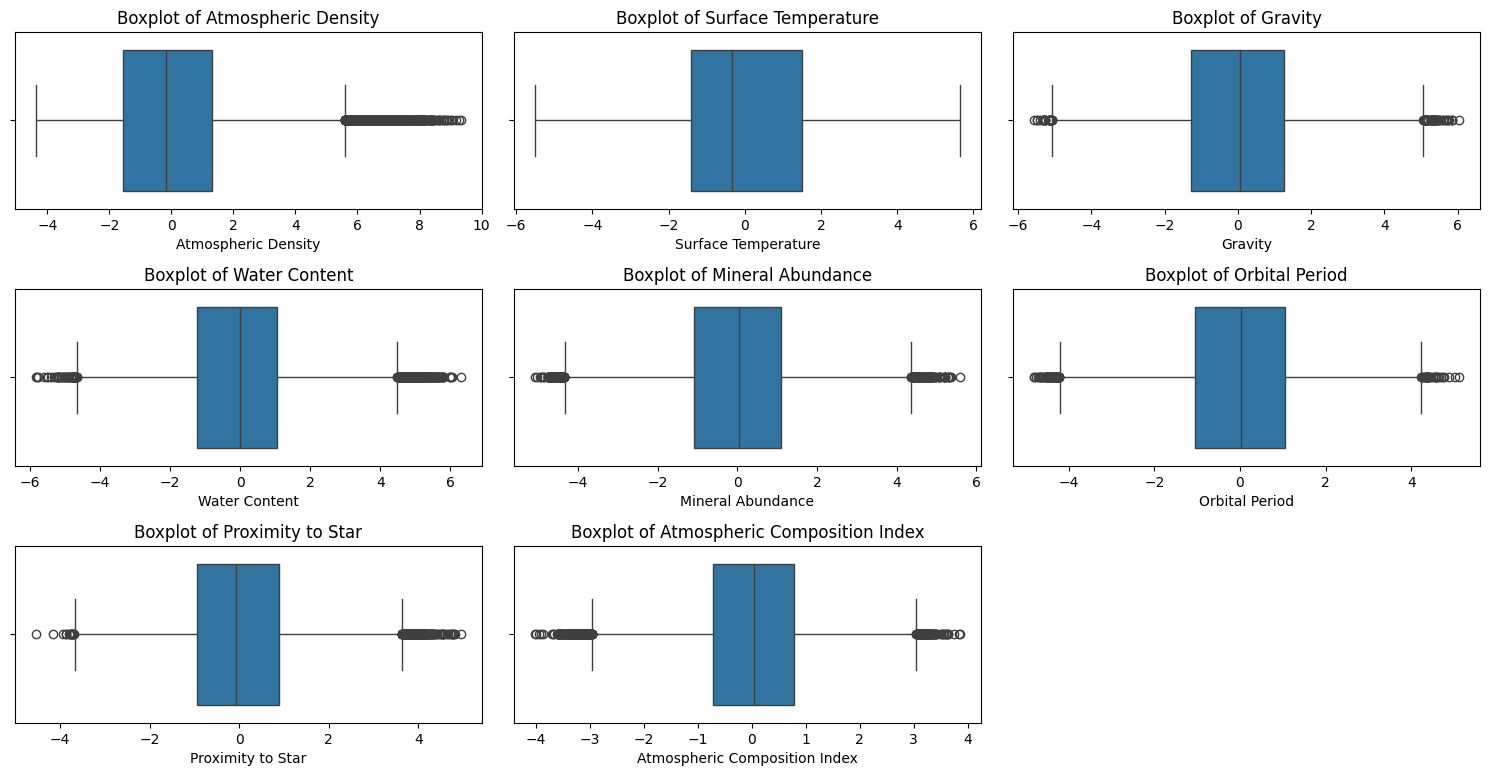


--- Fold 1 ---
XGBoost Accuracy: 0.8971
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
DNN Accuracy: 0.9021
CatBoost Accuracy: 0.8965
Ensemble Accuracy: 0.9014

--- Fold 2 ---
XGBoost Accuracy: 0.8991
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
DNN Accuracy: 0.9090
CatBoost Accuracy: 0.8985
Ensemble Accuracy: 0.9062

--- Fold 3 ---
XGBoost Accuracy: 0.9025
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN Accuracy: 0.9091
CatBoost Accuracy: 0.8995
Ensemble Accuracy: 0.9046

--- Fold 4 ---
XGBoost Accuracy: 0.9034
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
DNN Accuracy: 0.9086
CatBoost Accuracy: 0.9013
Ensemble Accuracy: 0.9091

--- Fold 5 ---
XGBoost Accuracy: 0.8969
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
DNN Accuracy: 0.9074
CatBoost Accuracy: 0.8953
Ensemble Accuracy: 0.9028

--- Cross-Validation Results ---
Average XGBoost Accuracy: 0.8998
Average DNN Accuracy: 0.9072
Average CatBoost Accuracy: 0.8982
Average Ensemble Accuracy: 0.9048
Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accurac

In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import warnings
warnings.filterwarnings("ignore")
!pip install XGBoost
!pip install catboost
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
!pip install --upgrade tensorflow
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Machine Learning Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# For Bayesian imputation
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# ---------------------------
# LOAD & EXPLORE DATA
# ---------------------------
train = pd.read_csv(r"/content/cosmicclassifierTraining.csv")

print("Dataset Shape:", train.shape)
print("\nData Types:\n", train.dtypes)
print("\nMissing Values:\n", train.isnull().sum())
print("\nDescriptive Statistics:\n", train.describe())

# Plot Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Prediction')
plt.title('Distribution of Planet Types')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot Numerical Feature Distributions
numerical_features = train.select_dtypes(include=np.number).columns.tolist()
if 'Prediction' in numerical_features:
    numerical_features.remove('Prediction')

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = train[numerical_features + ['Prediction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=train[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# ------------------------------------
# DATA CLEANING & PREPROCESSING
# ------------------------------------
# Remove invalid labels (ensure Prediction is >= 0)
train = train[train['Prediction'] >= 0]

# Function to extract numeric values from strings
def numeric_extractor(value):
    match = re.search(r'[-+]?\d*\.?\d+', str(value))
    return float(match.group()) if match else np.nan

# Apply numeric_extractor on specific columns
for col in ['Magnetic Field Strength', 'Radiation Levels']:
    train[col] = train[col].apply(numeric_extractor)

# Handle large negative values: set any numeric value less than -1e6 to NaN
neg_threshold = -1e6
numeric_cols = train.select_dtypes(include=["number"]).columns.tolist()
train[numeric_cols] = train[numeric_cols].applymap(lambda x: np.nan if x < neg_threshold else x)

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = train.select_dtypes(exclude=["number"]).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le_cat = LabelEncoder()
    train[col] = le_cat.fit_transform(train[col].astype(str))
    label_encoders[col] = le_cat

# Define raw features (from the CSV) to be used without additional feature engineering
raw_features = [
    'Atmospheric Density', 'Surface Temperature', 'Gravity',
    'Water Content', 'Mineral Abundance', 'Orbital Period',
    'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels',
    'Atmospheric Composition Index'
]

# Separate features and target
X_raw = train[raw_features].copy()
y = train['Prediction']

# Impute missing values in raw features using Bayesian Ridge–based Iterative Imputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), columns=raw_features)
joblib.dump(imputer, 'imputer.pkl')  # Save imputer for later use

# FINAL FEATURE SET REMAINS AS THE RAW FEATURES (NO EXTRA ENGINEERING)
features = raw_features

# -------------------------------
# SCALING & TARGET ENCODING
# -------------------------------
scaler = StandardScaler().fit(X_imputed)
X_scaled = scaler.transform(X_imputed)

le = LabelEncoder().fit(y)
y_encoded = le.transform(y)

# Save preprocessing artifacts
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(features, 'feature_names.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# -----------------------------------------------------
# K-FOLD CROSS-VALIDATION: TRAINING & EVALUATION
# -----------------------------------------------------
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store fold accuracies for each model and ensemble
xgb_fold_acc = []
dnn_fold_acc = []
catboost_fold_acc = []
ensemble_fold_acc = []

fold_no = 1
for train_idx, val_idx in skf.split(X_scaled, y_encoded):
    print(f"\n--- Fold {fold_no} ---")

    # Split fold data
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # ----- XGBoost Model -----
    xgb = XGBClassifier(
        objective='multi:softmax',
        num_class=10,
        n_estimators=1500,
        learning_rate=0.02,
        max_depth=9,
        subsample=0.7,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=0.5,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb.fit(X_train_fold, y_train_fold)
    xgb_preds = xgb.predict(X_val_fold)
    xgb_acc = accuracy_score(y_val_fold, xgb_preds)
    xgb_fold_acc.append(xgb_acc)
    print(f"XGBoost Accuracy: {xgb_acc:.4f}")

    # ----- Deep Neural Network -----
    dnn = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_fold.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    dnn.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    es = EarlyStopping(patience=15, restore_best_weights=True, verbose=0)
    dnn.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=200,
        batch_size=1024,
        callbacks=[es],
        verbose=0
    )
    dnn_preds = dnn.predict(X_val_fold).argmax(axis=1)
    dnn_acc = accuracy_score(y_val_fold, dnn_preds)
    dnn_fold_acc.append(dnn_acc)
    print(f"DNN Accuracy: {dnn_acc:.4f}")

    # ----- CatBoost Model -----
    catboost_model = CatBoostClassifier(
        iterations=1000,
        depth=8,
        learning_rate=0.05,
        loss_function='MultiClass',
        verbose=200,
        random_seed=42
    )
    catboost_model.fit(X_train_fold, y_train_fold, verbose=False)
    catboost_preds = catboost_model.predict(X_val_fold).astype(int).ravel()
    catboost_acc = accuracy_score(y_val_fold, catboost_preds)
    catboost_fold_acc.append(catboost_acc)
    print(f"CatBoost Accuracy: {catboost_acc:.4f}")

    # ----- Ensemble via Majority Voting -----
    all_preds = np.vstack((xgb_preds, dnn_preds, catboost_preds))
    ensemble_preds = mode(all_preds, axis=0).mode.flatten()
    ensemble_acc = accuracy_score(y_val_fold, ensemble_preds)
    ensemble_fold_acc.append(ensemble_acc)
    print(f"Ensemble Accuracy: {ensemble_acc:.4f}")

    fold_no += 1

# Average accuracies across folds
print("\n--- Cross-Validation Results ---")
print(f"Average XGBoost Accuracy: {np.mean(xgb_fold_acc):.4f}")
print(f"Average DNN Accuracy: {np.mean(dnn_fold_acc):.4f}")
print(f"Average CatBoost Accuracy: {np.mean(catboost_fold_acc):.4f}")
print(f"Average Ensemble Accuracy: {np.mean(ensemble_fold_acc):.4f}")

# -----------------------------------------------------
# FINAL MODEL TRAINING ON FULL TRAINING DATA
# -----------------------------------------------------
# Retrain XGBoost on full data
final_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=10,
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=9,
    subsample=0.7,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
final_xgb.fit(X_scaled, y_encoded)

# Retrain DNN on full data
final_dnn = Sequential([
    Dense(512, activation='relu', input_shape=(X_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
final_dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
es_final = EarlyStopping(patience=15, restore_best_weights=True, verbose=1)
final_dnn.fit(
    X_scaled, y_encoded,
    epochs=200,
    batch_size=1024,
    callbacks=[es_final],
    verbose=1
)

# Retrain CatBoost on full data
final_catboost = CatBoostClassifier(
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    loss_function='MultiClass',
    verbose=200,
    random_seed=42
)
final_catboost.fit(X_scaled, y_encoded, verbose=False)

# Save final models
final_xgb.save_model('final_xgb_model.ubj')
final_dnn.save('final_dnn_model.keras')
final_catboost.save_model('final_catboost_model.cbm')

# ---------------------------
# TESTING PIPELINE FUNCTION
# ---------------------------
def predict_test_data(test_path):
    # Load test data
    test = pd.read_csv(test_path)

    # Apply numeric_extractor on specific columns
    for col in ['Magnetic Field Strength', 'Radiation Levels']:
        test[col] = test[col].apply(numeric_extractor)

    # Handle large negative values in numeric columns
    numeric_cols_test = test.select_dtypes(include=["number"]).columns.tolist()
    test[numeric_cols_test] = test[numeric_cols_test].applymap(lambda x: np.nan if x < neg_threshold else x)

    # Convert categorical columns using stored label encoders
    categorical_cols_test = test.select_dtypes(exclude=["number"]).columns.tolist()
    stored_label_encoders = joblib.load('label_encoders.pkl')
    for col in categorical_cols_test:
        if col in stored_label_encoders:
            test[col] = stored_label_encoders[col].transform(test[col].astype(str))

    # Select raw features from test data
    X_test_raw = test[raw_features].copy()

    # Impute missing values using the fitted imputer
    imputer = joblib.load('imputer.pkl')
    X_test_imputed = pd.DataFrame(imputer.transform(X_test_raw), columns=raw_features)

    # No extra feature engineering; keep features as is
    # Scale test features using the saved scaler
    scaler = joblib.load('scaler.pkl')
    X_test_scaled = scaler.transform(X_test_imputed)

    # Generate predictions from each final model
    xgb_preds_test = final_xgb.predict(X_test_scaled)
    dnn_preds_test = final_dnn.predict(X_test_scaled).argmax(axis=1)
    catboost_preds_test = final_catboost.predict(X_test_scaled).astype(int).ravel()

    # Majority Voting Ensemble
    all_preds_test = np.vstack((xgb_preds_test, dnn_preds_test, catboost_preds_test))
    final_preds = mode(all_preds_test, axis=0).mode.flatten()

    return le.inverse_transform(final_preds)

# Example usage:
# test_predictions = predict_test_data(r"/content/cosmicclassifierTest.csv")
# submission = pd.DataFrame({
#     'Planet_ID': pd.read_csv(r"/content/cosmicclassifierTest.csv")['Planet_ID'],
#     'Predicted_Class': test_predictions
# })
# submission.to_csv('submission.csv', index=False)
